# Bagging

In [ ]:
from matplotlib import pyplot
from numpy import arange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.datasets import make_classification, make_regression

In [ ]:
seed = 5

In [ ]:
def make_clas_dataset(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5):
    X, Y = make_classification(n_samples=n_samples, n_features=n_features, 
                               n_informative=n_informative, n_redundant=n_redundant, 
                               random_state=random_state)
    return X, Y

In [ ]:
def make_reg_dataset(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5):
    X, Y = make_regression(n_samples=n_samples, n_features=n_features, 
                           n_informative=n_informative, noise=noise, random_state=random_state)
    return X, Y

In [ ]:
def evaluate_clas_model(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    results = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
    return results 

In [ ]:
def show_results(models, X, Y):
    results, names = [], []
    for name, model in models.items():
        scores = evaluate_clas_model(model, X, Y)
        results.append(scores)
        names.append(name)
        print(f'{name}: {scores.mean(): .3f} ({scores.std(): .3f})')
        
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

# Bagged Decision Trees Ensemble

Bagging is an ensemble machine learning algorithm that combines the predictions from many
decision trees. It is also easy to implement given that it has few key hyperparameters and
sensible heuristics for configuring these hyperparameters. Bagging performs well in general and
provides the basis for a whole field of ensemble of decision tree algorithms such as the popular
random forest and extra trees ensemble algorithms, as well as the lesser-known Pasting, Random
Subspaces, and Random Patches ensemble algorithms.

**Bagging Ensemble Algorithm**

Bootstrap Aggregation, or Bagging for short, is an ensemble machine learning algorithm.
Specifically, it is an ensemble of decision tree models, although the bagging technique can also
be used to combine the predictions of other types of models. As its name suggests, bootstrap
aggregation is based on the idea of the bootstrap sample. A bootstrap sample is a sample of a
dataset with replacement. Replacement means that a sample drawn from the dataset is replaced,
allowing it to be selected again and perhaps multiple times in the new sample. This means that
the sample may have duplicate examples from the original dataset. The bootstrap sampling
technique is used to estimate a population statistic from a small data sample. This is achieved
by drawing multiple bootstrap samples, calculating the statistic on each, and reporting the
mean statistic across all samples.

An example of using bootstrap sampling would be estimating the population mean from a
small dataset. Multiple bootstrap samples are drawn from the dataset, the mean calculated on
each, then the mean of the estimated means is reported as an estimate of the population mean.
Surprisingly, the bootstrap method provides a robust and accurate approach to estimating
statistical quantities compared to a single estimate on the original dataset.

This same approach can be used to create an ensemble of decision tree models. This is
achieved by drawing multiple bootstrap samples from the training dataset and fitting a decision
tree on each. The predictions from the decision trees are then combined to provide a more
robust and accurate prediction than a single decision tree (typically, but not always).

Predictions are made for regression problems by averaging the prediction across the decision
trees. Predictions are made for classification problems by taking the majority vote prediction
for the classes from across the predictions made by the decision trees. The bagged decision trees
are effective because each decision tree is fit on a slightly different training dataset, which in
turn allows each tree to have minor differences and make slightly different skillful predictions.
Technically, we say that the method is effective because the trees have a low correlation between
predictions and, in turn, prediction errors.

Decision trees, specifically unpruned decision trees, are used as they slightly overfit the
training data and have a high variance. Other high-variance machine learning algorithms can
be used, such as a k-nearest neighbors algorithm with a low k value, although decision trees
have proven to be the most effective.

Bagging does not always offer an improvement. For low-variance models that already perform
well, bagging can result in a decrease in model performance.

## Evaluate Bagging Ensembles

**Bagging for Classification**

In [ ]:
row = [-3.47224758, 1.95378146, 0.04875169, -0.91592588, -3.54022468, 1.96405547,
-7.72564954, -2.64787168, -1.81726906, -1.67104974, 2.33762043, -4.30273117, 0.4839841,
-1.28253034, -10.6704077, -0.7641103, -3.58493721, 2.07283886, 0.08385173, 0.91461126]

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
X, Y = make_clas_dataset()
X.shape, Y.shape

((1000, 20), (1000,))

In [ ]:
model = BaggingClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
print(f'Accuracy: {results.mean(): .3f} ({results.std(): .3f})')

Accuracy:  0.865 ( 0.037)


We can also use the Bagging model as a final model and make predictions for classification.

In [ ]:
model.fit(X, Y)

BaggingClassifier()

In [ ]:
yhat = model.predict([row])
yhat

array([1])

In [ ]:
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 1


**Bagging for Regression**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
X, Y = make_reg_dataset()

In [ ]:
model = BaggingRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, 
                          scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
print(f'MAE: {results.mean(): .3f} ({results.std(): .3f})')

MAE: -99.772 ( 10.417)


In [ ]:
model.fit(X, Y)

BaggingRegressor()

In [ ]:
yhat = model.predict([row])

In [ ]:
print(f'Prediction: {yhat[0]}')

Prediction: -88.26220906961095


## Bagging Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider
tuning for the Bagging ensemble and their effect on model performance.

**Explore Number of Trees**

An important hyperparameter for the Bagging algorithm is the number of decision trees used in
the ensemble. Typically, the number of trees is increased until the model performance stabilizes.
Intuition might suggest that more trees will lead to overfitting, although this is not the case.
Bagging and related ensembles of decision trees algorithms (like random forest) appear to be
somewhat immune to overfitting the training dataset given the stochastic nature of the learning
algorithm.

In [ ]:
def get_models(param):
    models = dict()
    
    if param == 'n_estimators':
        n_trees = [10,50]
        for n in n_trees:
            models[str(n)] = BaggingClassifier(n_estimators=n)
            
    if param == 'max_samples':
        for i in arange(0.1, 1.1, 0.1):
            key = '%.1f' % i
            models[key] = BaggingClassifier(max_samples=i)
            
    if param == 'base_estimator':
        models = dict()
        for i in range(1,21):
            base = KNeighborsClassifier(n_neighbors=i)
            models[str(i)] = BaggingClassifier(base_estimator=base)
            
    return models

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
models = get_models('n_estimators')

10:  0.858 ( 0.043)
50:  0.875 ( 0.038)


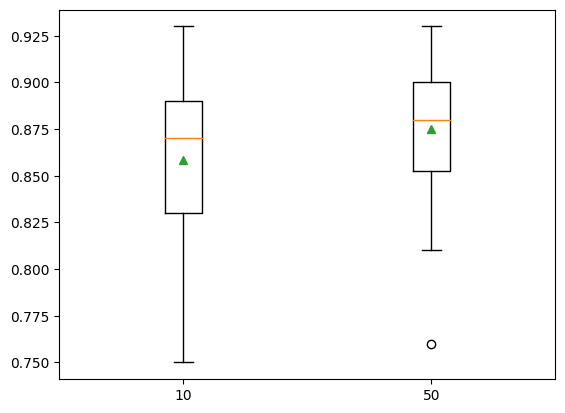

In [ ]:
show_results(models, X, Y)

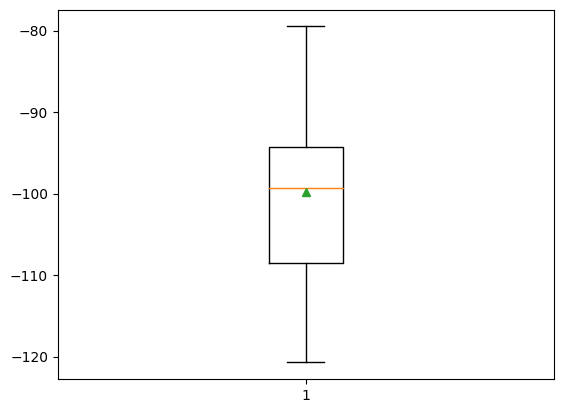

In [ ]:
pyplot.boxplot(results,  showmeans=True)
pyplot.show()

**Explore Number of Samples**

The size of the bootstrap sample can also be varied. The default is to create a bootstrap sample
that has the same number of examples as the original dataset. Using a smaller dataset can
increase the variance of the resulting decision trees and could result in better overall performance

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
models = get_models(param='max_samples')

0.1:  0.799 ( 0.045)
0.2:  0.833 ( 0.038)
0.3:  0.839 ( 0.036)
0.4:  0.843 ( 0.043)
0.5:  0.849 ( 0.040)
0.6:  0.859 ( 0.035)
0.7:  0.861 ( 0.033)
0.8:  0.861 ( 0.038)
0.9:  0.854 ( 0.042)
1.0:  0.865 ( 0.037)


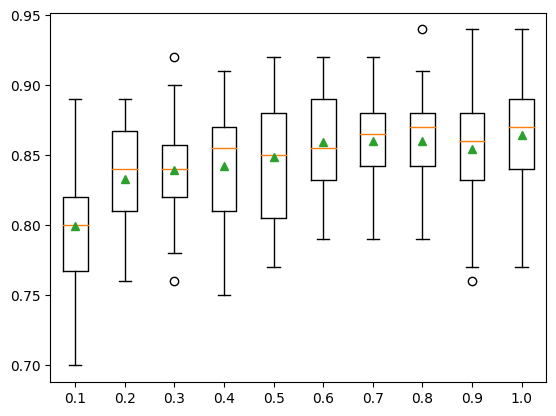

In [ ]:
show_results(models, X, Y)

**Explore Alternate Algorithm**

Decision trees are the most common algorithm used in a bagging ensemble. The reason for this
is that they are easy to configure to have a high variance and because they perform well in
general. Other algorithms can be used with bagging and must be configured to have a modestly
high variance. One example is the k-nearest neighbors algorithm where the k value can be
set to a low value. The algorithm used in the ensemble is specified via the base estimator
argument and must be set to an instance of the algorithm and algorithm configuration to use.

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
models = get_models('base_estimator')

1:  0.884 ( 0.035)
2:  0.884 ( 0.034)
3:  0.887 ( 0.038)
4:  0.886 ( 0.035)
5:  0.886 ( 0.037)
6:  0.882 ( 0.038)
7:  0.876 ( 0.041)
8:  0.879 ( 0.038)
9:  0.876 ( 0.035)
10:  0.876 ( 0.033)
11:  0.875 ( 0.035)
12:  0.872 ( 0.031)
13:  0.876 ( 0.032)
14:  0.878 ( 0.029)
15:  0.872 ( 0.031)
16:  0.871 ( 0.036)
17:  0.874 ( 0.032)
18:  0.873 ( 0.039)
19:  0.873 ( 0.035)
20:  0.873 ( 0.036)


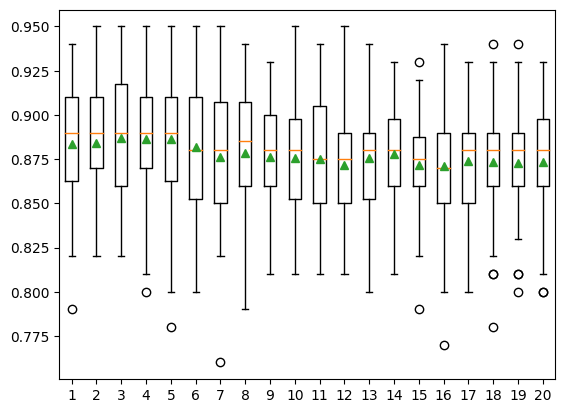

In [ ]:
show_results(models, X, Y)

# Random Subspace Ensemble

Random Subspace Ensemble is a machine learning algorithm that combines the predictions from
multiple decision trees trained on different subsets of columns in the training dataset. Randomly
varying the columns used to train each contributing member of the ensemble has the effect of
introducing diversity into the ensemble and, in turn, can lift performance over using a single
decision tree. It is related to other ensembles of decision trees such as bootstrap aggregation
(bagging) that creates trees using different samples of rows from the training dataset, and
random forest that combines ideas from bagging and the random subspace ensemble. Although
decision trees are often used, the general random subspace method can be used with any machine
learning model whose performance varies meaningfully with the choice of input features. In
this tutorial, you will discover how to develop random subspace ensembles for classification and
regression. After completing this tutorial, you will know:
* Random subspace ensembles are created from decision trees fit on different samples of
features (columns) in the training dataset.
* How to use the random subspace ensemble for classification and regression with scikit-learn.
* How to explore the effect of random subspace model hyperparameters on model perfor-
mance.

## Evaluate Random Subspace Ensembles

**Random Subspace Ensemble for Classification**

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
model = BaggingClassifier(bootstrap=False, max_features=10)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
print(f'{results.mean(): 0.3f} ({results.std():.3f})')

In [ ]:
model.fit(X,Y)

In [ ]:
yhat = model.predict([row])
print(yhat[0])

**Random Subspace Ensemble for Regression**

In [ ]:
X, Y = make_reg_dataset()

In [ ]:
model = BaggingRegressor(bootstrap=False, max_features=10)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
print(f'{results.mean():0.3f} ({results.std():0.3f})')

In [ ]:
model.fit(X, Y)

In [ ]:
yhat = model.predict([reg_row])
print(f'{int(yhat[0])}')

## Random Subspace Ensemble Hyperparameters

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10,50,100]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n, bootstrap=False, max_features=10)
    return models

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(models, X, Y)

**Explore Number of Features**

In [ ]:
def get_models():
    models = dict()
    for n in range(1,5):
        models[str(n)] = BaggingClassifier(n_estimators=100, bootstrap=False, max_features=n)
    return models

In [ ]:
X,Y = make_clas_dataset()

In [ ]:
models = get_models()

In [ ]:
show_results(models, X, Y)

**Explore Alternate Algorithm**

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False, max_features=10)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
print(f'Mean Accuracy: {results.mean():.3f} ({results.std():.3f})')

# Feature Selection Bagging Ensemble

## Single Feature Selection Method Ensembles

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

**ANOVA F-statistic Ensemble**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
def get_ensemble(n_features):
    models = []
    for i in range(1, n_features+1):
        feat_selec = SelectKBest(score_func=f_classif, k=i)
        model = DecisionTreeClassifier()
        pipe = Pipeline([('fs', feat_selec), ('m', model)])
        models.append((str(i), pipe))
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
ensemble = get_ensemble(X.shape[1])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(ensemble, X, Y, scoring='accuracy', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

**Mutual Information Ensemble**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
def get_ensemble(n_features):
    models = []
    for i in range(1, n_features+1):
        fs = SelectKBest(score_func=mutual_info_classif, k=i)
        model = DecisionTreeClassifier()
        pipe = Pipeline([('fs', fs), ('m', model)])
        models.append((str(i), pipe))
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [ ]:
X,Y = make_clas_dataset()

In [ ]:
ensemble = get_ensemble(X.shape[1])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(ensemble, X, Y, scoring='accuracy', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

**Recursive Feature Selection Ensemble**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
def get_ensemble(n_fatures):
    models = []
    for i in range(1, n_fatures+1):
        fs = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipe = Pipeline([('fs', fs), ('m', model)])
        models.append((str(i), pipe))
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [ ]:
X, Y = make_clas_dataset()

In [ ]:
ensemble = get_ensemble(X.shape[1])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(ensemble, X, Y, scoring='accuracy', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

## Combined Feature Selection Ensembles

**Ensemble With Fixed Number of Features**

**Ensemble With Contiguous Number of Features**

# Random Forest Ensemble

## Evaluate Random Forest Ensembles

**Random Forest for Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X, Y = make_clas_dataset(random_state=3)

In [ ]:
model = RandomForestClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
print(f'Mean Accuracy: {results.mean():.3f} ({results.std():.3f})')

In [ ]:
model.fit(X, Y)

In [ ]:
row = [-8.52381793, 5.24451077, -12.14967704, -2.92949242, 0.99314133, 0.67326595,
-0.38657932, 1.27955683, -0.60712621, 3.20807316, 0.60504151, -1.38706415, 8.92444588,
-7.43027595, -2.33653219, 1.10358169, 0.21547782, 1.05057966, 0.6975331, 0.26076035]

In [ ]:
yhat = model.predict([row])
print(yhat[0])

**Random Forest for Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X , Y = make_reg_dataset(random_state=2)

In [ ]:
model = RandomForestRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv)
print(f'{results.mean():.3f} ({results.std():.3f})')

In [ ]:
model.fit(X, Y)

In [ ]:
row = [-0.89483109, -1.0670149, -0.25448694, -0.53850126, 0.21082105, 1.37435592,
0.71203659, 0.73093031, -1.25878104, -2.01656886, 0.51906798, 0.62767387, 0.96250155,
1.31410617, -1.25527295, -0.85079036, 0.24129757, -0.17571721, -1.11454339, 0.36268268]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]}')

## Random Forest Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Explore Number of Samples**

In [ ]:
from numpy import arange

In [ ]:
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        if i == 1.0:
            i = None 
        models[key] = RandomForestClassifier(max_samples=i)
    return models

In [ ]:
X , y = make_clas_dataset()

In [ ]:
models = get_models()

In [ ]:
show_results(models, X, y)

**Explore Number of Features**

In [ ]:
def get_models():
    models = dict()
    for i in range(1,8):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models        

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()

In [ ]:
show_results(models, X, y)

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(models, X, y)

**Explore Tree Depth**

In [ ]:
def get_models():
    models = dict()
    depths = [i for i in range(1,4)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(models, X, y)

# Extra Trees Ensemble

## Evaluate Extra Trees Ensembles

**Extra Trees for Classification**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X, y = make_clas_dataset(random_state=4)

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

 0.907 ( 0.025)


In [ ]:
model.fit(X, y)

ExtraTreesClassifier()

In [ ]:
row = [-3.52169364, 4.00560592, 2.94756812, -0.09755101, -0.98835896, 1.81021933,
-0.32657994, 1.08451928, 4.98150546, -2.53855736, 3.43500614, 1.64660497, -4.1557091,
-1.55301045, -0.30690987, -1.47665577, 6.818756, 0.5132918, 4.3598337, -4.31785495]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]}')

0


**Extra Trees for Regression**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
X, y = make_reg_dataset(random_state=3)

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

-69.667 ( 4.984)


In [ ]:
model.fit(X, y)

ExtraTreesRegressor()

In [ ]:
row = [-0.56996683, 0.80144889, 2.77523539, 1.32554027, -1.44494378, -0.80834175,
-0.84142896, 0.57710245, 0.96235932, -0.66303907, -1.13994112, 0.49887995, 1.40752035,
-0.2995842, -0.05708706, -2.08701456, 1.17768469, 0.13474234, 0.09518152, -0.07603207]

In [ ]:
yhat = model.predict([row])
print(f'{int(yhat[0])}')

53


## Extra Trees Hyperparameters

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n)
    return models 

In [ ]:
X, y = make_clas_dataset(random_state=4)

In [ ]:
models = get_models()
models

{'10': ExtraTreesClassifier(n_estimators=10),
 '50': ExtraTreesClassifier(n_estimators=50),
 '100': ExtraTreesClassifier()}

10:  0.855 ( 0.025)
50:  0.902 ( 0.028)
100:  0.906 ( 0.023)


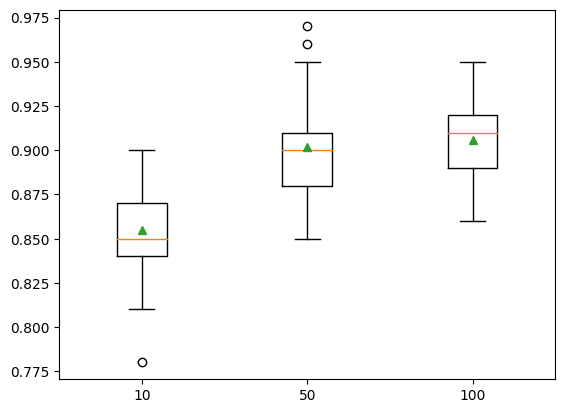

In [ ]:
show_results(models, X, y)

**Explore Number of Features**

In [ ]:
def get_models():
    models = dict()
    for i in range(1, 5):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models

In [ ]:
X , y = make_clas_dataset(random_state=4)

In [ ]:
models = get_models()
models

{'1': ExtraTreesClassifier(max_features=1),
 '2': ExtraTreesClassifier(max_features=2),
 '3': ExtraTreesClassifier(max_features=3),
 '4': ExtraTreesClassifier(max_features=4)}

1:  0.895 ( 0.025)
2:  0.901 ( 0.026)
3:  0.907 ( 0.028)
4:  0.904 ( 0.025)


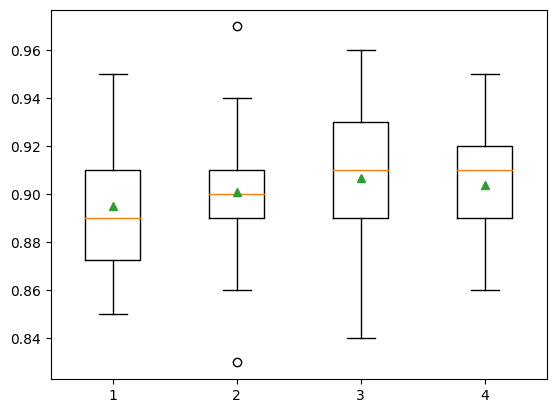

In [ ]:
show_results(models, X, y)

**Explore Minimum Samples per Split**

In [ ]:
def get_models():
    models = dict()
    for i in range(2, 5):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models

In [ ]:
X, y = make_clas_dataset(random_state=4)

In [ ]:
models = get_models()
models

{'2': ExtraTreesClassifier(),
 '3': ExtraTreesClassifier(min_samples_split=3),
 '4': ExtraTreesClassifier(min_samples_split=4)}

2:  0.909 ( 0.026)
3:  0.913 ( 0.025)
4:  0.909 ( 0.027)


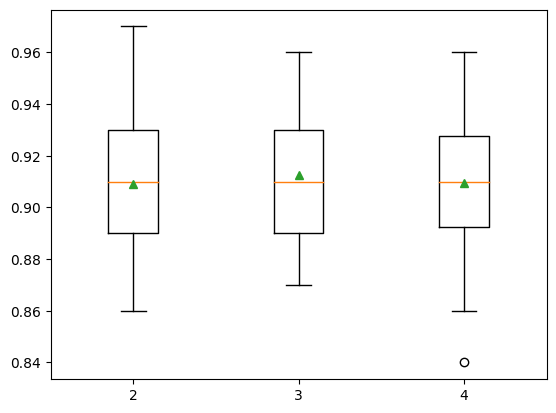

In [ ]:
show_results(models, X, y)

# Data Transform Bagging Ensemble